In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import glob
import os

['camCalib\\Photo-1.jpeg', 'camCalib\\Photo-10.jpeg', 'camCalib\\Photo-11.jpeg', 'camCalib\\Photo-12.jpeg', 'camCalib\\Photo-13.jpeg', 'camCalib\\Photo-14.jpeg', 'camCalib\\Photo-15.jpeg', 'camCalib\\Photo-16.jpeg', 'camCalib\\Photo-17.jpeg', 'camCalib\\Photo-18.jpeg', 'camCalib\\Photo-19.jpeg', 'camCalib\\Photo-2.jpeg', 'camCalib\\Photo-20.jpeg', 'camCalib\\Photo-21.jpeg', 'camCalib\\Photo-22.jpeg', 'camCalib\\Photo-3.jpeg', 'camCalib\\Photo-4.jpeg', 'camCalib\\Photo-5.jpeg', 'camCalib\\Photo-6.jpeg', 'camCalib\\Photo-7.jpeg', 'camCalib\\Photo-8.jpeg', 'camCalib\\Photo-9.jpeg']


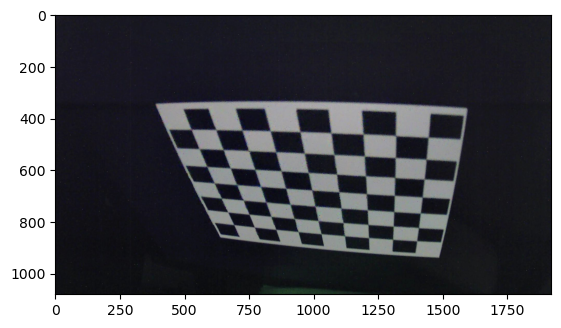

In [3]:
calibration_images = glob.glob('camCalib/*.jpeg')
print(calibration_images)

plt.imshow(mpimg.imread(calibration_images[21]))
plt.show()

In [4]:
rows = 6
columns = 9
square_size = 13 #24 #expressed in mm

objp = np.zeros((rows*columns,3), np.float32)
objp[:,:2] = np.mgrid[0:columns, 0:rows].T.reshape(-1,2)*square_size
#print(objp)

In [5]:
def get_points(calibration_images, objp, rows=6, columns=9):
    # Arrays to store object points and image points from all the images.
    objpoints = [] # 3d points in real world space
    imgpoints = [] # 2d points in image plane.

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
    # Step through the list and search for chessboard corners
    for idx, fname in enumerate(calibration_images):
        image = cv2.imread(fname)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Find the chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, (columns,rows), None)

        # If found, add object points, image points
        if ret == True:
            objpoints.append(objp)
            imgpoints.append(corners)
            # Draw and display the corners
            cv2.drawChessboardCorners(image, (9,6), corners, ret)
            print(image.shape)
            plt.imshow(image)
            plt.show()
            cv2.waitKey(500)
    return objpoints, imgpoints

(1080, 1920, 3)


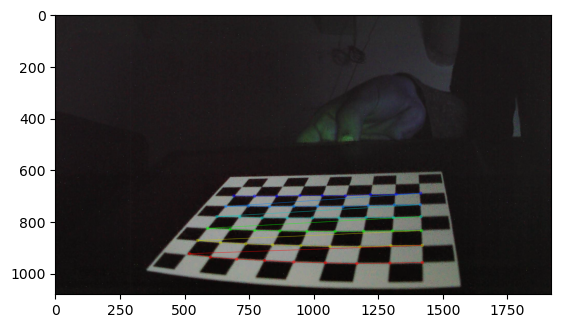

An example of an object point (top-left corner) and its corresponding image point
[0. 0. 0.]
[[691.7551 701.1654]]


In [6]:
objpoints, imgpoints = get_points(calibration_images, objp)

print("An example of an object point (top-left corner) and its corresponding image point")
print(objpoints[0][0])
print(imgpoints[0][0])
cv2.destroyAllWindows()

In [7]:
img_shape = (1080, 1920)
flags = ( cv2.CALIB_FIX_K2+ cv2.CALIB_FIX_K3 )

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_shape, None, None, flags=flags)

print("-- Camera Parameters --")
print("Root Mean Squared Error")
print(ret)
print("")
print("Camera Matrix")
print(mtx)
print("")
print("Distorion Coefficients Matrix")
print(dist)
print("")
print("Rotation Vector")
print(rvecs)
print("")
print("Translation Vector")
print(tvecs)

-- Camera Parameters --
Root Mean Squared Error (between 0.1 and 1)
2.092675460778433

Camera Matrix
[[1.70298615e+03 0.00000000e+00 7.62055860e+02]
 [0.00000000e+00 3.29490108e+03 1.06542787e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

Distorion Coefficients Matrix
[[-0.56450908  0.         -0.07844914  0.07076096  0.        ]]

Rotation Vector
(array([[-1.23484404],
       [ 0.25048048],
       [ 0.24263882]]),)

Translation Vector
(array([[-11.02354275],
       [-28.74331375],
       [264.3321887 ]]),)


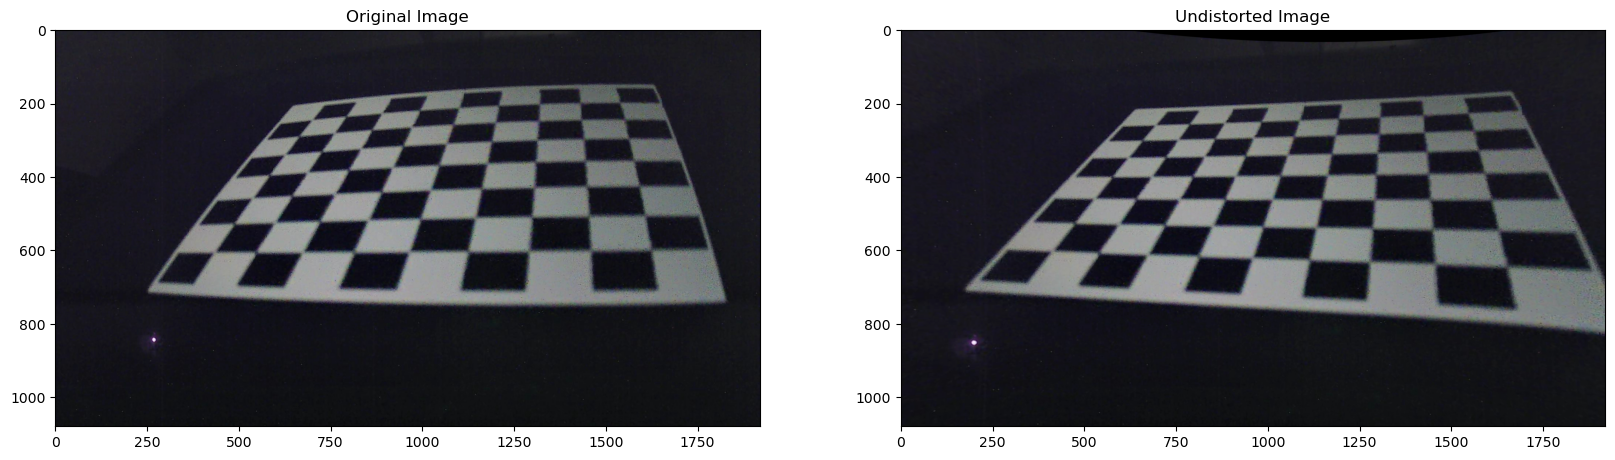

In [11]:
img = mpimg.imread(calibration_images[3])
undistorted = cv2.undistort(img, mtx, dist, None, mtx)

## Display the image before and after distortion
f, (ax0, ax1) = plt.subplots(1,2,figsize=(20,10))
ax0.imshow(img)
ax0.set_title("Original Image")
ax1.imshow(undistorted)
ax1.set_title("Undistorted Image")
plt.show()